In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
# GPU 사용 가능 여부 확인 -> GPU or CPU 선택

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cpu


In [ ]:
# 데이터 다운로드 

# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("salader/dogs-vs-cats")

# print("Path to dataset files:", path)

In [20]:
# 데이터 준비 1.
transform = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])

In [8]:
a = [1, 2, 3]
a += [4, 5, 6]
a

[1, 2, 3, 4, 5, 6]

In [17]:
# 데이터 준비 2-1.
import os
import random

bd = "data-files/dogs_vs_cats/"

train_files = []
test_files = []
for dir in ["dogs", "cats"]:
    train_files += [os.path.join(bd, 'train', dir, f) for f in os.listdir(f'{bd}/train/{dir}')]
    test_files += [os.path.join(bd, 'test', dir, f) for f in os.listdir(f'{bd}/test/{dir}')]

random.shuffle(train_files)
random.shuffle(test_files)

# print( len(train_files), len(test_files) )
# train_files[:5]



In [26]:
# 데이터 준비 2-2.
from torch.utils.data import Dataset
from PIL import Image

class DogsVsCatsDataset(Dataset):
    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        transformed_img = self.transform(img)

        label = None
        if 'cat' in img_path.split("\\")[-1].lower():
            label = 0
        else:
            label = 1

        return transformed_img, label


In [27]:
# 데이터 준비 2-3.

train_dataset = DogsVsCatsDataset(train_files, transform)
test_dataset = DogsVsCatsDataset(test_files, transform)

In [28]:
# 데이터 준비 3.

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=32,
                                          shuffle=True)

In [29]:
# 데이터 확인

for X, y in train_loader:
    print(X.shape, y.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32])


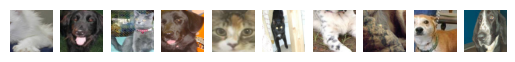

tensor([0, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [30]:
for idx in range(10):
    plt.subplot(1, 10, idx+1)
    plt.axis('off')
    plt.imshow(X[idx, :, :, :].permute(1, 2, 0))
plt.show()
y[:10]